# Homework 1

mz2476. Marina Zavalina

## Problem 1

$$ Cov(x_t, x_s) = Cov\Big(2 cos(2\pi \frac{t+15}{50} ) + w_t, 2 cos(2\pi \frac{s+15}{50} ) + w_s \Big) = Cov\Big(2 cos(2\pi \frac{t+15}{50} ), 2 cos(2\pi \frac{s+15}{50} ) \Big) + Cov\Big(2 cos(2\pi \frac{t+15}{50} ), w_s \Big) + Cov\Big(w_t, 2 cos(2\pi \frac{s+15}{50} ) \Big) + Cov\Big(w_t, w_s \Big)$$  

As $2 cos(2\pi \frac{s+15}{50} ) $ and $2 cos(2\pi \frac{t+15}{50} ) $ are constants, $w_s$ and $w_t$ are independent,

$$ Cov(x_t, x_s) = 0 + 0 + 0 + 0 = 0$$

Therefore, 
$$ACF = 0.$$

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, ccf
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

np.random.seed(42)

In [29]:
w_list = np.random.normal(size=500)
t = np.array([i for i in range(500)])
const_list = 2 * np.cos(2 * np.pi * (t + 15) / 50)
x_list = const_list + w_list

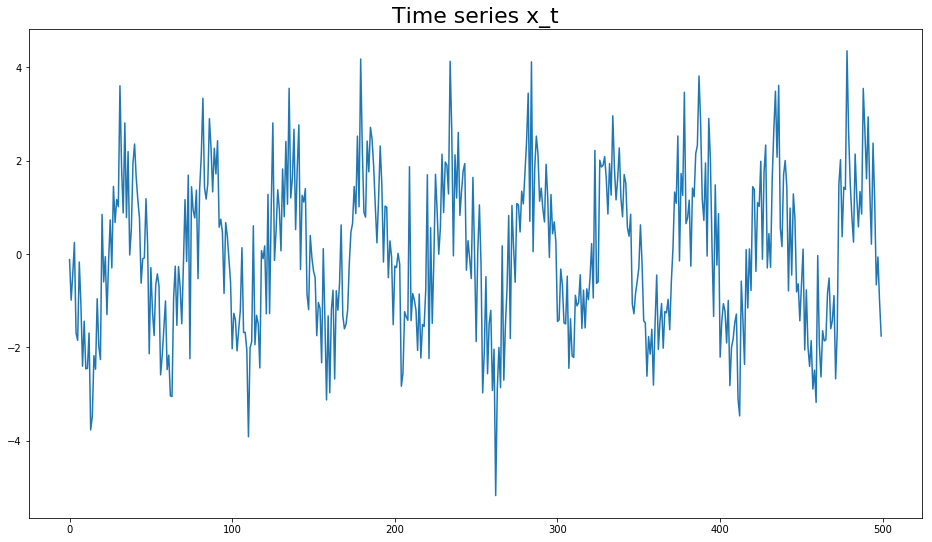

In [30]:
plt.figure(figsize=(16,9))
plt.plot(x_list)
plt.title('Time series x_t', size=22)
plt.show()

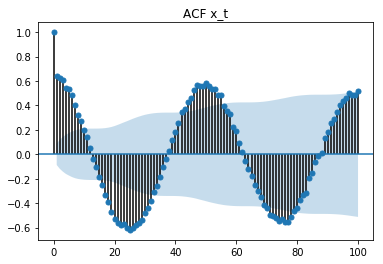

In [34]:
# Calculate ACF
lag = 100
acf_val = acf(x=x_list, nlags=lag)
plot_acf(x=x_list, lags=lag, title="ACF x_t")
plt.show()

We can see that sample ACF is not 0, it shows us the signal (the period is the same as in the model). It happens because theoretical covariance (ACF) is zero for deterministic functions. And we exactly have deterministic finction plus white noise. 

If we look at the formula of sample ACF, we will see that scalar product of series $x_t, x_s$ is used there. That's why sample ACF is not 0, and in fact shows us the period of the series.

## Problem 2

First model: 
$$x_t = 0.8x_{t-1} - 0.2 x_{t-2} + w_t - 1.1w_{t-1}$$
$$x_t - 0.8x_{t-1} + 0.2 x_{t-2} = w_t - 1.1w_{t-1}$$
$$(1 - 0.8 B + 0.2 B^2) x_{t} = (1 - 1.1B)w_t $$

$$p = 2, q = 1$$

Roots of $1 - 0.8 B + 0.2 B^2$ are $B_1 = 2 - i, B_2 = 2 + i$.  
As $|B_1| = |B_2| = \sqrt{5} > 1,$ the process is causal.

The root of $1 - 1.1B$ is $\frac{10}{11}$. 
As $\frac{10}{11} < 1,$ the process is not invertible.

Second model: 
$$x_t = 0.7x_{t-1} - 0.1 x_{t-2} + w_t - 0.2w_{t-1}$$
$$x_t - 0.7x_{t-1} + 0.1 x_{t-2} = w_t - 0.2w_{t-1}$$
$$(1 - 0.7 B + 0.1 B^2) x_{t} = (1 - 0.2B)w_t $$
$$0.1 (B - 5) (B - 2) x_{t} = - 0.2(B - 5)w_t $$
$$(B - 2) x_{t} = - 2w_t $$

$$p = 1, q = 0$$

The root of $B - 2$ is $2$. 
As $2 > 1,$ the process is causal.

It is invertible as we can represent $w_t: w_t = -\frac{1}{2} (B - 2)$.

## Problem 3

$$Cov(U, V) = E \big( (U - E(U)) (V - E(V)) \big), ~~ U = \sum_i a_i X_i, V = \sum_j b_j Y_j$$

As expectation is a linear operator, $1. E(\lambda Z) = \lambda E(Z)$ and $2. E(Z + W) = E(Z) + E(W)$. We can apply these properties, then

$$Cov(U, V) = E \big( (U - E(U)) (V - E(V)) \big) = E \big( (\sum_i a_i X_i - E(\sum_i a_i X_i)) (\sum_j b_j Y_j - E(\sum_j b_j Y_j)) \big) = Cov(U, V) = E \big( (\sum_i a_i X_i - \sum_i a_i E(X_i)) (\sum_j b_j Y_j - \sum_j b_j E(Y_j)) \big) = E \big( \sum_i a_i (X_i - E(X_i)) \sum_j b_j (Y_j - E(Y_j)) \big) = E \big( \sum_{i, j} a_i b_j (X_i - E(X_i))(Y_j - E(Y_j)) \big) = \sum_{i, j} a_i b_j E \big( (X_i - E(X_i))(Y_j - E(Y_j)) \big) = \sum_{i, j} a_i b_j Cov (X_i, Y_j)$$

## Problem 4

$$y_t = a_2 t^2 + a_1 t + a_0 + x_t$$

As $y_t$ is quadratic in $t$, we should take $\nabla^2$.

$$\nabla^2 y_t = (1 - B)^2 y_t = (1 - 2B + B^2) y_t = a_2 t^2 + a_1 t + a_0 + x_t - 2 a_2 (t - 1)^2  - 2 a_1 (t - 1) - 2 a_0 - 2 x_{t-1} + a_2 (t-2)^2 + a_1 (t-2) + a_0 + x_{t-2} = 
a_2 (t^2 - 2(t-1)^2 + (t-2)^2) + a_1(t - 2(t-1) + t-2) + a_0(1 -2 +1) + x_t - 2 x_{t-1} + x_{t-2} = a_2 (2t-1 - 2t + 3) + (1 - B)^2 x_t = 2 a_2 + \nabla^2 x_t $$

Now we have stationary series.

$$(1 - B)^2 y_t = 2 a_2 + (1 - B)^2 x_t$$

For $m$-th order polynomial we should apply $(1 - B)^m$ to get stationary series.

The rule is the same as for derivatives, if we think of $\nabla$ as a derivative in $t$. So we take derivatives of both parts till polynomial  dependent in $t$ disappears.